Ex1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def brownianmotion(X,delta,num_move):
    """
    Input: start point 'X', step size 'delta', number of move 'num_move'
    Output: all position moved by 'pos_x,pos_y'
    """
    x_init=X[0]
    y_init=X[1]
    x_collet = []
    y_collet = []
    while (1):
        move_x = np.random.normal(0, 1, (num_move))
        move_y = np.random.normal(0, 1, (num_move))
     
        pos_x=(np.cumsum(move_x)*np.sqrt(delta))+x_init
        pos_y=(np.cumsum(move_y)*np.sqrt(delta)) +y_init
        # to judge if the point is out of ring
        for i in range(len(pos_x)):
            if pos_x[i]**2+pos_y[i]**2 > 1:
                pos_x=pos_x[:i+1]
                pos_y=pos_y[:i+1]
                x_collet.append(pos_x)
                y_collet.append(pos_y)
                x_collet=(np.concatenate(x_collet))
                y_collet=(np.concatenate(y_collet))
                return list(x_collet),list(y_collet)
            
        x_init=pos_x[-1]
        y_init=pos_y[-1]
        x_collet.append(pos_x)
        y_collet.append(pos_y)
            
       

In [9]:
"""set up the parameter"""
delta=0.0001
X = (0.2,0.4)
num_move = 10
all_collet=[]

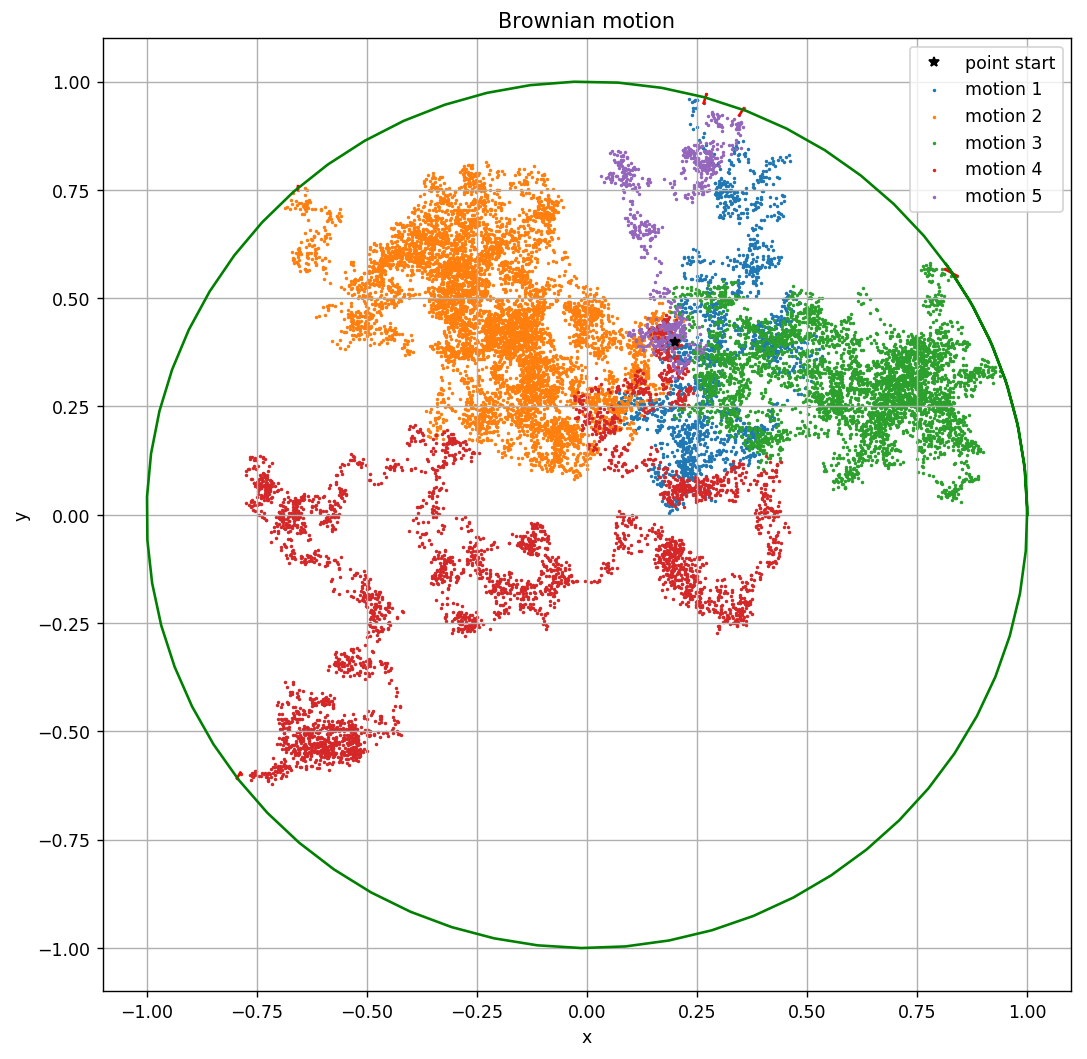

In [10]:
plt.figure(figsize=(10,10.1),dpi=125)
plt.plot(X[0],X[1],'*',c='black',label='point start')

"""to indicate Brownian motion you wnat to show by n"""
for i in range(5): 
    all_collet.append(list(brownianmotion(X,delta,num_move)))
    plt.scatter(all_collet[i][0],all_collet[i][1],s=1,label="motion %d" % (i+1))
    plt.plot(all_collet[i][0][-2:],all_collet[i][1][-2:],'r') #draw interpolates linearly between the two last positions
"""to draw the ring,title,etc."""
_t = np.arange(0,7,0.1)
_x = np.cos(_t)
_y = np.sin(_t)
plt.plot(_x,_y,'g-')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Brownian motion')
plt.grid(True)
plt.legend()
plt.show()



ex2

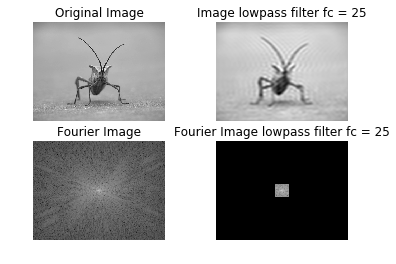

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import lowpassfilter2D as lp2d
%matplotlib inline

"""read the image and put it in fonction in lowpassfilter2D"""
fc=25
img = cv2.imread('stinkbug.png', 0)
iimg=lp2d.filter_2d(img,fc)